In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from collections import Counter

import time
import math

## Извлечение датасета

In [2]:
#Заголовки данных согласно файлу с описанием glass.tag --Variant 11
data_headers = ["ID", "RI", "NA2O", "MGO", "AL2O3", "SIO2", "K2O", "CAO", "BAO", "FE2O3", "TYPE"]
data = pd.read_csv('C:/Учеба/Мага/1 семестр/Интеллектуальные системы и технологии/Практика 3-4/glass.data', names=data_headers)
data.head(10)

,ID,RI,NA2O,MGO,AL2O3,SIO2,K2O,CAO,BAO,FE2O3,TYPE
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,8,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,9,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,10,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


## Соответствие значений столбца TYPE и названий типов

In [3]:
types = data.iloc[:,10]
types_name = {1: "building_windows_float_processed",
            2 : "building_windows_non_float_processed",
            3 : "vehicle_windows_float_processed",
            5 : "containers",
            6 : "tableware",
            7 :"headlamps"}

## Разбиваем данные на обучающую и тестовую выборку

In [4]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, 1:-1].values,
                                                    types,
                                                    test_size=0.3,
                                                    shuffle=True,
                                                    stratify=types,
                                                    random_state=151)

## Обучение RF классификатора

In [5]:
def function1(x):
    # Обучение модели
    rf_class = RandomForestClassifier(n_estimators=int(x[0]),
                            criterion=CRITERION,
                            max_depth = int(x[1]),
                            min_samples_split = x[2]/100.0,
                            min_samples_leaf = int(x[3])).fit(X_train, y_train)
    # Предсказание тестовых данных
    y_test_pred = rf_class.predict(X_test)
    # Получение точности определения данных, знак минуса, так как стремимся МАКСИМИЗИРОВАТЬ функцию
    return - metrics.accuracy_score(y_test, y_test_pred)
def function2(x):
    x_ = x[:,0]
    y_ = x[:,1]
    z_ = x[:,2]
    k_ = x[:,3]
    # Обучение модели
    rf_class = RandomForestClassifier(n_estimators=int(x_),
                            criterion=CRITERION,
                            max_depth = int(y_),
                            min_samples_split = int(z_)/100.0,
                            min_samples_leaf = int(k_)).fit(X_train, y_train)
    # Предсказание тестовых данных
    y_test_pred = rf_class.predict(X_test)
    # Получение точности определения данных, знак минуса, так как стремимся МАКСИМИЗИРОВАТЬ функцию
    return  - metrics.accuracy_score(y_test, y_test_pred)

# Пчелиный алгоритм ищет максимум, поэтому нужно взять функцию со знаком -
def negative_function1(c):
    return - function1(c)

In [6]:
genetic_varbound = differential_boundaries = np.array([[1,50],[1, 50],[1, 100],[1,50]],dtype=int)
pso_varbound = bees_varbound = np.array([np.array([1, 1, 1, 1]), np.array([50,50,100,50])],dtype=int)

## Измерения качества раскола для примеси Gini

In [7]:
CRITERION = 'gini'

### Genetic algorithm

In [8]:
from geneticalgorithm import geneticalgorithm as ga

 The best solution found:                                                                           
 [26. 12.  1.  2.]

 Objective function:
 -0.8615384615384616


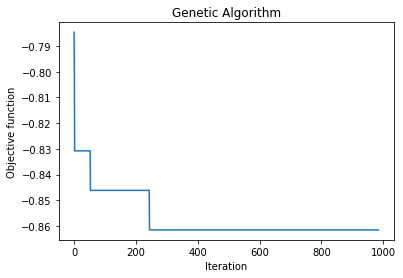

Время выполнения  2065.3727338314056


In [9]:
t = time.time()
model=ga(function=function1,dimension=4,variable_type='int', variable_boundaries = genetic_varbound)
model.run()
t=time.time()-t
print('Время выполнения ', t)

## Значение objective function указано со знаком минус

### Алгоритм Роя частиц

In [10]:
import pyswarms as ps
from pyswarms.utils.functions import single_obj as fx
from pyswarms.utils.plotters import (plot_cost_history, plot_contour, plot_surface)
from pyswarms.utils.plotters.formatters import Mesher, Designer

In [23]:
options = {'c1':1.3, 'c2':2, 'w':0.3}

t=time.time()
optimizer = ps.single.GlobalBestPSO(n_particles=1, dimensions=4, options=options, bounds=pso_varbound)
cost, pos = optimizer.optimize(function2, iters=5000)

print('Координата лучшего решения ', pos)
print('Лучшая точность ', -cost)

t=time.time()-t
print('Время выполнения ', t)

2021-11-15 12:21:33,465 - pyswarms.single.global_best - INFO - Optimize for 5000 iters with {'c1': 1.3, 'c2': 2, 'w': 0.3}
pyswarms.single.global_best: 100%|██████████████████████████████████████████████████████████|5000/5000, best_cost=-.708
2021-11-15 12:25:13,952 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.7076923076923077, best pos: [49.87146274 36.71890575 32.5672021   3.24152657]


Координата лучшего решения  [49.87146274 36.71890575 32.5672021   3.24152657]
Лучшая точность  0.7076923076923077
Время выполнения  220.49405813217163


### Пчелиный алгоритм

In [12]:
from bees_algorithm import BeesAlgorithm

In [13]:
t=time.time()
alg = BeesAlgorithm(negative_function1,
                    bees_varbound[0],
                    bees_varbound[1],
                    ns = 10, nb= 18, ne = 1,
                    nrb = 5, nre = 10, stlim=100
                   )
alg.performFullOptimisation(max_iteration=100)

best = alg.best_solution #Получение лучшего решения
# лучшее достигнутое значение функции
print('Лучшее значение ', best.score)
# Координаты лучшего решения)
print('Координаты лучшего решения ', best.values)
t=time.time()-t
print('Время выполнения ', t)

Лучшее значение  0.8769230769230769
Координаты лучшего решения  [13.479563234832309, 41.097358350926164, 1.0843741629393981, 1.04005948260989]
Время выполнения  329.65084171295166


### Алгоритм дифференциальной эволюции

In [14]:
from scipy.optimize import differential_evolution

In [15]:
t=time.time()
result = differential_evolution(function1, differential_boundaries)
# лучшее достигнутое значение функции
print('Лучшее значение ', -result.fun)
# Координаты лучшего решения
print('Координаты лучшего решения ', result.x)
t=time.time()-t
print('Время выполнения ', t)

Лучшее значение  0.8769230769230769
Координаты лучшего решения  [44.43643839 46.60055454  1.9299708   1.41262014]
Время выполнения  968.8617794513702


## Измерение качества раскола энтропией

In [16]:
CRITERION = 'entropy'

### Genetic algorithm

 The best solution found:                                                                           
 [12. 45.  4.  2.]

 Objective function:
 -0.8769230769230769


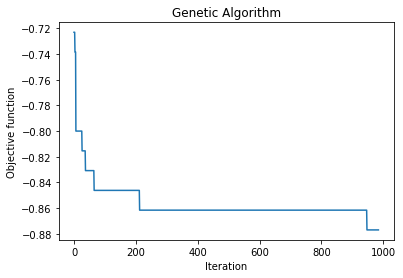

Время выполнения  2082.2815947532654


In [17]:
t = time.time()
model=ga(function=function1,dimension=4,variable_type='int', variable_boundaries = genetic_varbound)
model.run()
t=time.time()-t
print('Время выполнения ', t)

## Значение objective function указано со знаком минус

### Алгоритм Роя частиц

In [20]:
options = {'c1':1.3, 'c2':2, 'w':0.3}

t=time.time()
optimizer = ps.single.GlobalBestPSO(n_particles=1, dimensions=4, options=options, bounds=pso_varbound)
cost, pos = optimizer.optimize(function2, iters=5000)

print('Координата лучшего решения ', pos)
print('Лучшая точность ', -cost)

t=time.time()-t
print('Время выполнения ', t)

2021-11-15 12:19:13,896 - pyswarms.single.global_best - INFO - Optimize for 5000 iters with {'c1': 1.3, 'c2': 2, 'w': 0.3}
pyswarms.single.global_best: 100%|██████████████████████████████████████████████████████████|5000/5000, best_cost=-.708
2021-11-15 12:19:40,061 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.7076923076923077, best pos: [ 4.97482974 31.55722542 14.17374935 26.28401573]


Координата лучшего решения  [ 4.97482974 31.55722542 14.17374935 26.28401573]
Лучшая точность  0.7076923076923077
Время выполнения  26.171433687210083


### Пчелиный алгоритм

In [24]:
t=time.time()
alg = BeesAlgorithm(negative_function1,
                    bees_varbound[0],
                    bees_varbound[1],
                    ns = 10, nb= 18, ne = 1,
                    nrb = 5, nre = 10, stlim=100
                   )
alg.performFullOptimisation(max_iteration=100)

best = alg.best_solution #Получение лучшего решения
# лучшее достигнутое значение функции
print('Лучшее значение ', best.score)
# Координаты лучшего решения)
print('Координаты лучшего решения ', best.values)
t=time.time()-t
print('Время выполнения ', t)

Лучшее значение  0.8615384615384616
Координаты лучшего решения  [18.297555698643226, 48.677496528254565, 1, 1]
Время выполнения  273.8675465583801


### Алгоритм дифференциальной эволюции

In [25]:
t=time.time()
result = differential_evolution(function1, differential_boundaries)
# лучшее достигнутое значение функции
print('Лучшее значение ', -result.fun)
# Координаты лучшего решения
print('Координаты лучшего решения ', result.x)
t=time.time()-t
print('Время выполнения ', t)

Лучшее значение  0.8923076923076924
Координаты лучшего решения  [23.43405553 26.15283387  2.02934235  1.42618794]
Время выполнения  1452.61181974411


## Примечания

В датасете представлено 6 категорий стекол:

1: "building_windows_float_processed" - 70 экземпляров

2 : "building_windows_non_float_processed" - 76 экземпляров

3 : "vehicle_windows_float_processed" - 17 экземпляров

5 : "containers" - 13 экземпляров

6 : "tableware" - 9 экземпляров

7 :"headlamps" - 29 экземпляров

Первые две категории преобладают над остальными данными, в связи с чем объекты некоторых классов попадают в другие классы.

Благодаря применению алгоритмов оптимизации удалось улучшить качество предсказания данных. В качестве целевой функции оптимизации была выбрана точность определения ТЕСТОВЫХ данных.

Ниже сопоставлены точность классификаторов из работы 5-6 и текущей (9-10) (на тестовых данных):

gini: 0.8 -> 0.8769230769230769, параметры согласно пчелиному алгоритму (n_estimators = 13, max_depth = 41, min_samples_split = 0.010843741629393981, min_samples_leaf = 1), согласно алгоритму дифференциальной эволюции (n_estimators = 44, max_depth = 46, min_samples_split = 0.019299708, min_samples_leaf = 1)

entropy: (был отфильтрован grid_search) -> 0.8923076923076924, параметры согласно алгоритму дифференциальной эволюции (n_estimators = 23, max_depth = 26, min_samples_split = 0.0202934235, min_samples_leaf = 1)

Как видно из данного сравнения, благодаря эволюционным алгоритмам оптимизации удалось получить более оптимальные параметры RF классификатора. Прирост точности составил 9%. Качество классификации оказалось лучше при использовании в качестве критерия Энтропии, который был отброшен при использовании grid search в работе 5-6 (стоит сказать, что в работе 5-6 перебор по сетке не был настолько обширным, поэтому качество перебора ниже)

## Вывод
Применение алгоритмов оптимизации для поиска лучших параметров классификации во всех рассмотренных случаях увеличивало качество определения класса объекта.
Также это демонстрирует, что лучшие параметры классификации не всегда можно получить с первого раза, их поиск также является отдельной задачей.